In [123]:
import pandas as pd
import numpy as np

In [124]:
housing = pd.read_csv('housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [125]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [126]:
# Converting Yes to 1 and No to 0
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no': 0})
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no': 0})
housing['basement'] = housing['basement'].map({'yes': 1, 'no': 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea'] = housing['prefarea'].map({'yes':1, 'no':0})

In [127]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [128]:
# creating a dummy variable for 'furmishingstatus'
status = pd.get_dummies(housing['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [129]:
# we cabn get rid of the furnished column
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [130]:
# adding the new column to master data frame
housing = pd.concat([housing, status], axis=1)

In [131]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [132]:
#Lets create a new metric 'areaperbedroom'
housing['areaperbedroom'] = housing['area']/housing['bedrooms']

# metric bathroom per bedroom
housing['bbratio'] = housing['bathrooms']/housing['bedrooms']

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0,1855.0,0.250000


# Rescaling the Features
It is extremely important to rescale the variables so that they have a comparable scale. There are two common ways of rescaling

Normalisation (min-max scaling) and
standardisation (mean-o, sigma-1) Let's try normalisation

In [133]:
def normalize(x):
    return ((x - np.min(x))/(max(x)-min(x)))

#applying normalizing to all of the columns

housing = housing.apply(normalize)
housing.head()

TypeError: ("unsupported operand type(s) for -: 'str' and 'str'", 'occurred at index furnishingstatus')

In [134]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'semi-furnished',
       'unfurnished', 'areaperbedroom', 'bbratio'],
      dtype='object')

In [135]:
# putting feature variable to x 
x = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished',
       'unfurnished', 'areaperbedroom', 'bbratio']]

y = housing['price']

In [136]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

# Building a linear model

In [137]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
lm_1 = sm.OLS(y_train, x_train).fit()
print (lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Sat, 06 Feb 2021   Prob (F-statistic):           4.56e-82
Time:                        13:47:20   Log-Likelihood:                -5811.5
No. Observations:                 381   AIC:                         1.165e+04
Df Residuals:                     365   BIC:                         1.172e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6.585e+05   7.13e+05     

# VIF
Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables.
This ratio is calculated for each independent variable. 
A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.

In [138]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [139]:
vif_cal(input_data=housing, dependent_col="price")

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

# Correlation Matrix

In [140]:
# importing matplotlib and seaborn 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib as inline

UsageError: unrecognized arguments: inline


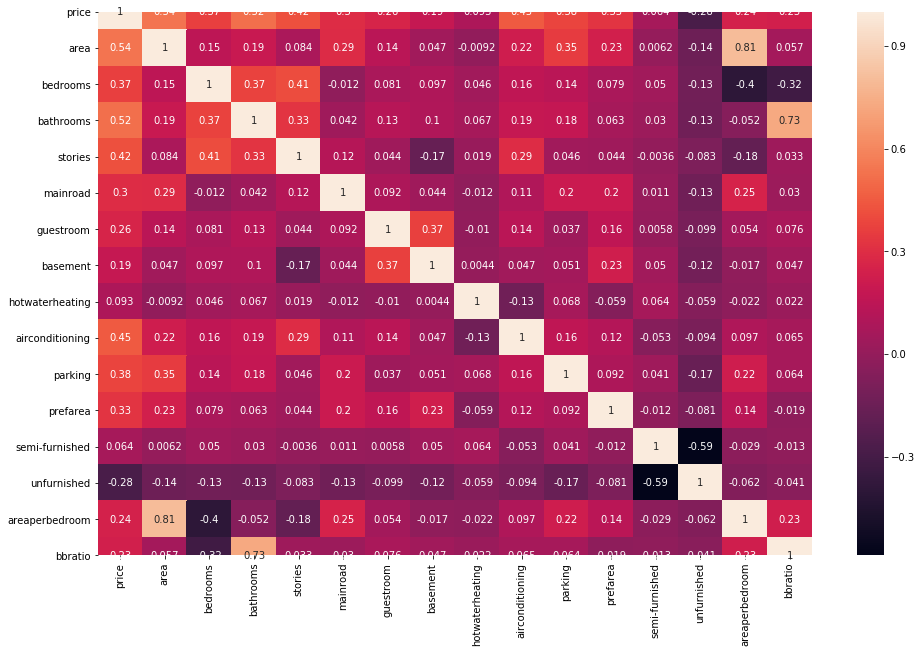

In [141]:
# let's see the corelation matrix 
plt.figure(figsize = (16,10))
sns.heatmap(housing.corr(), annot = True)

# Dropping the variable and updating the model

In [142]:
# dropping highly correlated variables and insignificant variables 
x_train = x_train.drop('bbratio', 1)

#create a second fitted model 
lm_2 = sm.OLS(y_train, x_train).fit()

#Let's see the summary of our second linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     57.03
Date:                Sat, 06 Feb 2021   Prob (F-statistic):           6.46e-83
Time:                        13:47:24   Log-Likelihood:                -5811.6
No. Observations:                 381   AIC:                         1.165e+04
Df Residuals:                     366   BIC:                         1.171e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            8.595e+05   5.29e+05     

In [143]:
# dropping highly correlated variables and insignificant variables 
x_train = x_train.drop('bedrooms',1)

#create a second fitted model 
lm_3 = sm.OLS(y_train, x_train).fit()

#Let's see the summary of our second linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     61.23
Date:                Sat, 06 Feb 2021   Prob (F-statistic):           1.66e-83
Time:                        13:47:24   Log-Likelihood:                -5812.3
No. Observations:                 381   AIC:                         1.165e+04
Df Residuals:                     367   BIC:                         1.171e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.131e+05   2.76e+05     

In [144]:
# dropping highly correlated variables and insignificant variables 
x_train = x_train.drop('airconditioning',1)

#create a second fitted model 
lm_4 = sm.OLS(y_train, x_train).fit()

#Let's see the summary of our second linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     58.07
Date:                Sat, 06 Feb 2021   Prob (F-statistic):           2.92e-77
Time:                        13:47:25   Log-Likelihood:                -5829.7
No. Observations:                 381   AIC:                         1.169e+04
Df Residuals:                     368   BIC:                         1.174e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.198e+05   2.88e+05     

# Making Predictions using the Final Model 

Prediction with Model 4

In [145]:
# Adding a constant variable to test dataframe
x_test_m4 = sm.add_constant(x_test)



In [146]:
# creating x_test_m4 dataframe by dropping variable from x_test_m4
x_test_m4 = x_test_m4.drop(["bedrooms","bbratio","airconditioning"], axis=1)



In [147]:
# Making prediction 
y_pred_m4 = lm_4.predict(x_test_m4)

Text(0, 0.5, 'Housing Price')

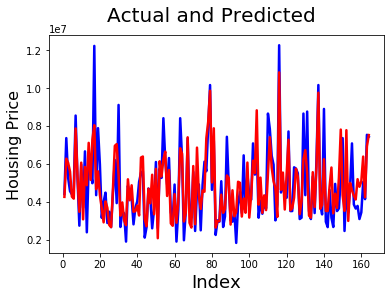

In [148]:
# Actual vs Predicted
c = [i for i in range(1,165,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m4, color="red",  linewidth=2.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16)                       # Y-label

Text(0, 0.5, 'y_pred')

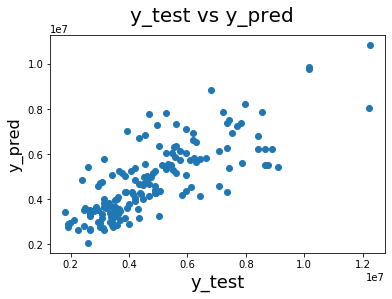

In [150]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'ytest-ypred')

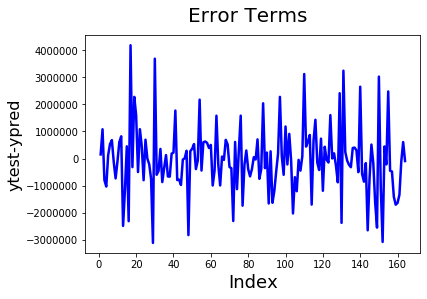

In [152]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,165,1)]
plt.plot(c,y_test-y_pred_m4, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0, 0.5, 'Index')

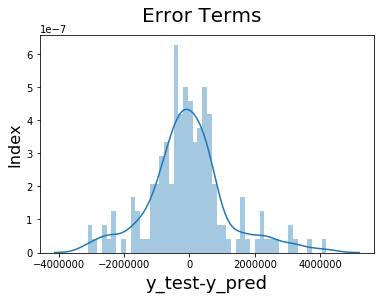

In [153]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_m4),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16) 

In [154]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m4)))

RMSE : 1224463.562366561
